## Análise Descritiva e Preditiva dos dados relativos ao Sistema de Operações do Crédito Rural e do Proagro (Sicor)

###  ADENILSON SILVA

## ANÁLISE DOS DADOS

###  1 - Importando bibliotecas e criando funções

In [1]:
import pandas as pd  # Manipulação de dados tabulares (DataFrame)
import seaborn as sns  # Visualização estatística de dados
import matplotlib.pyplot as plt  # Criação de gráficos
import numpy as np # Operações matemáticas e funções numéricas avançadas

### 2 - Leitura dos dados

In [2]:
df = pd.read_parquet('dados/dados_tratados/dados_tratados.parquet')
df.head()

,data_inicio_empreendimento,data_fim_emprendimento,finalidade,atividade,modalidade,produto,variedade,cesta_safra,consorcio,ano,taxa_juro,sigla_uf,ano_criacao_empresa,categoria_empresa
0,2018-08-29,NaT,custeio,pecuario(a),pesca,armacao para barco de pesca,manutencao/aquisicao,ano civil / ano de exploracao,valor invalido,2022,5.00,RJ,2018,Em crescimento
1,2018-08-29,NaT,custeio,pecuario(a),pesca,armacao para barco de pesca,manutencao/aquisicao,ano civil / ano de exploracao,valor invalido,2022,0.50,MA,2018,Em crescimento
2,2018-08-29,NaT,custeio,pecuario(a),pesca,armacao para barco de pesca,manutencao/aquisicao,ano civil / ano de exploracao,valor invalido,2022,0.50,MA,2018,Em crescimento
3,2018-08-29,NaT,custeio,pecuario(a),pesca,armacao para barco de pesca,manutencao/aquisicao,ano civil / ano de exploracao,valor invalido,2021,5.75,MA,2018,Em crescimento
4,2018-08-29,NaT,custeio,pecuario(a),pesca,armacao para barco de pesca,manutencao/aquisicao,ano civil / ano de exploracao,valor invalido,2022,5.00,BA,2018,Em crescimento


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21497976 entries, 0 to 21497975
Data columns (total 14 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   data_inicio_empreendimento  datetime64[ns]
 1   data_fim_emprendimento      datetime64[ns]
 2   finalidade                  object        
 3   atividade                   object        
 4   modalidade                  object        
 5   produto                     object        
 6   variedade                   object        
 7   cesta_safra                 object        
 8   consorcio                   object        
 9   ano                         Int64         
 10  taxa_juro                   float64       
 11  sigla_uf                    object        
 12  ano_criacao_empresa         int32         
 13  categoria_empresa           object        
dtypes: Int64(1), datetime64[ns](2), float64(1), int32(1), object(9)
memory usage: 2.2+ GB


In [4]:
df.describe(include='all')

,data_inicio_empreendimento,data_fim_emprendimento,finalidade,atividade,modalidade,produto,variedade,cesta_safra,consorcio,ano,taxa_juro,sigla_uf,ano_criacao_empresa,categoria_empresa
count,21497976,7167034,21497976,21497976,21497976,21497976,21497976,21497976,21404452,21497976.0,2.149798e+07,21497976,2.149798e+07,21497976
unique,NaN,NaN,4,2,51,375,321,125,53,<NA>,NaN,27,NaN,4
top,NaN,NaN,investimento,pecuario(a),lavoura,bovinos,nao se aplica,ano civil / ano de exploracao,nao consorciado,<NA>,NaN,RS,NaN,Tradicional
freq,NaN,NaN,11851916,11662546,6002941,5985014,8191510,10443000,14351582,<NA>,NaN,3473579,NaN,12068783
mean,1995-06-13 11:57:26.953146112,2019-01-08 15:29:25.299624960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.283651,3.619639e+00,NaN,1.995301e+03,NaN
min,1984-01-01 00:00:00,2013-03-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,-2.520000e+00,NaN,1.984000e+03,NaN
25%,1984-01-01 00:00:00,2017-03-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0,5.000000e-01,NaN,1.984000e+03,NaN
50%,1984-01-01 00:00:00,2020-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,3.000000e+00,NaN,1.984000e+03,NaN
75%,2006-07-01 00:00:00,2020-02-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,5.500000e+00,NaN,2.006000e+03,NaN
max,2022-08-03 00:00:00,2099-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.0,1.000000e+02,NaN,2.022000e+03,NaN


### 3 - Gráficos

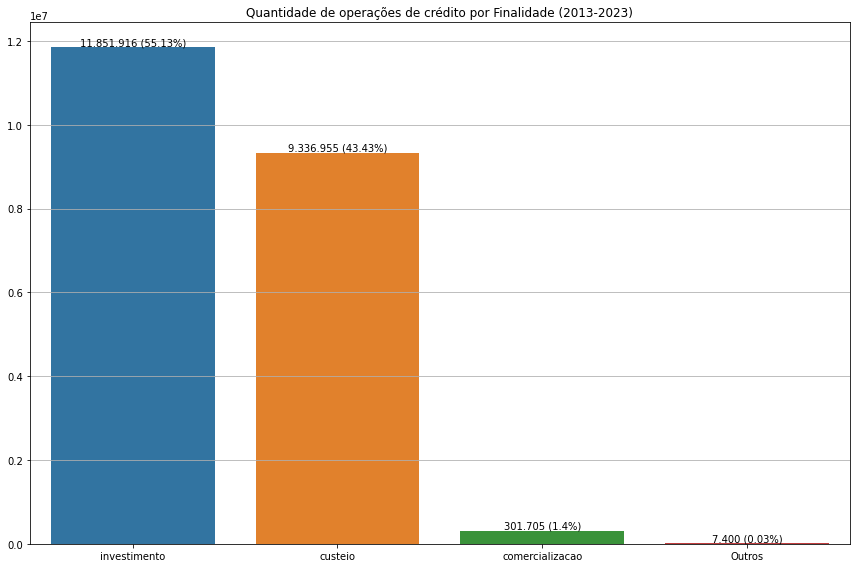

In [5]:
df_finalidade = df['finalidade'].value_counts().reset_index()
df_finalidade.columns = ['finalidade', 'quantidade']
df_finalidade['percentual'] = ((df_finalidade['quantidade'] / df_finalidade['quantidade'].sum()) * 100).round(2)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_finalidade, x='finalidade', y='quantidade', hue="finalidade", legend=False)
for i, (index, row) in enumerate(df_finalidade[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(df_finalidade['finalidade'][i], valor, valor_e_percentual_formatado, 
                ha='center', va='bottom', fontsize=10)
ax.grid(True, axis='y')
plt.title('Quantidade de operações de crédito por Finalidade (2013-2023)')
plt.ylabel(None)
plt.xlabel(None)
plt.tight_layout()
plt.show()

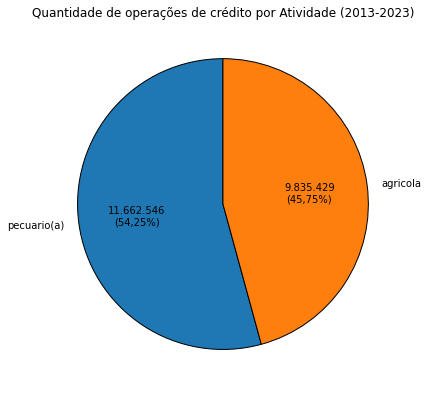

In [6]:
df_atividade = df['atividade'].value_counts().reset_index()
df_atividade.columns = ['atividade', 'quantidade']
df_atividade['percentual'] = ((df_atividade['quantidade'] / df_atividade['quantidade'].sum()) * 100).round(2)

plt.figure(figsize=(6, 6))
colors = sns.color_palette("pastel")

plt.pie(df_atividade['quantidade'], 
        labels=df_atividade['atividade'], 
        autopct=lambda p: f'{int(p/100*df_atividade["quantidade"].sum()):,}\n({p:.2f}%)'.replace(",", "X").replace(".", ",").replace("X", "."),
        startangle=90,
        wedgeprops={'edgecolor': 'black'})

plt.title('Quantidade de operações de crédito por Atividade (2013-2023)')
plt.tight_layout()
plt.show()

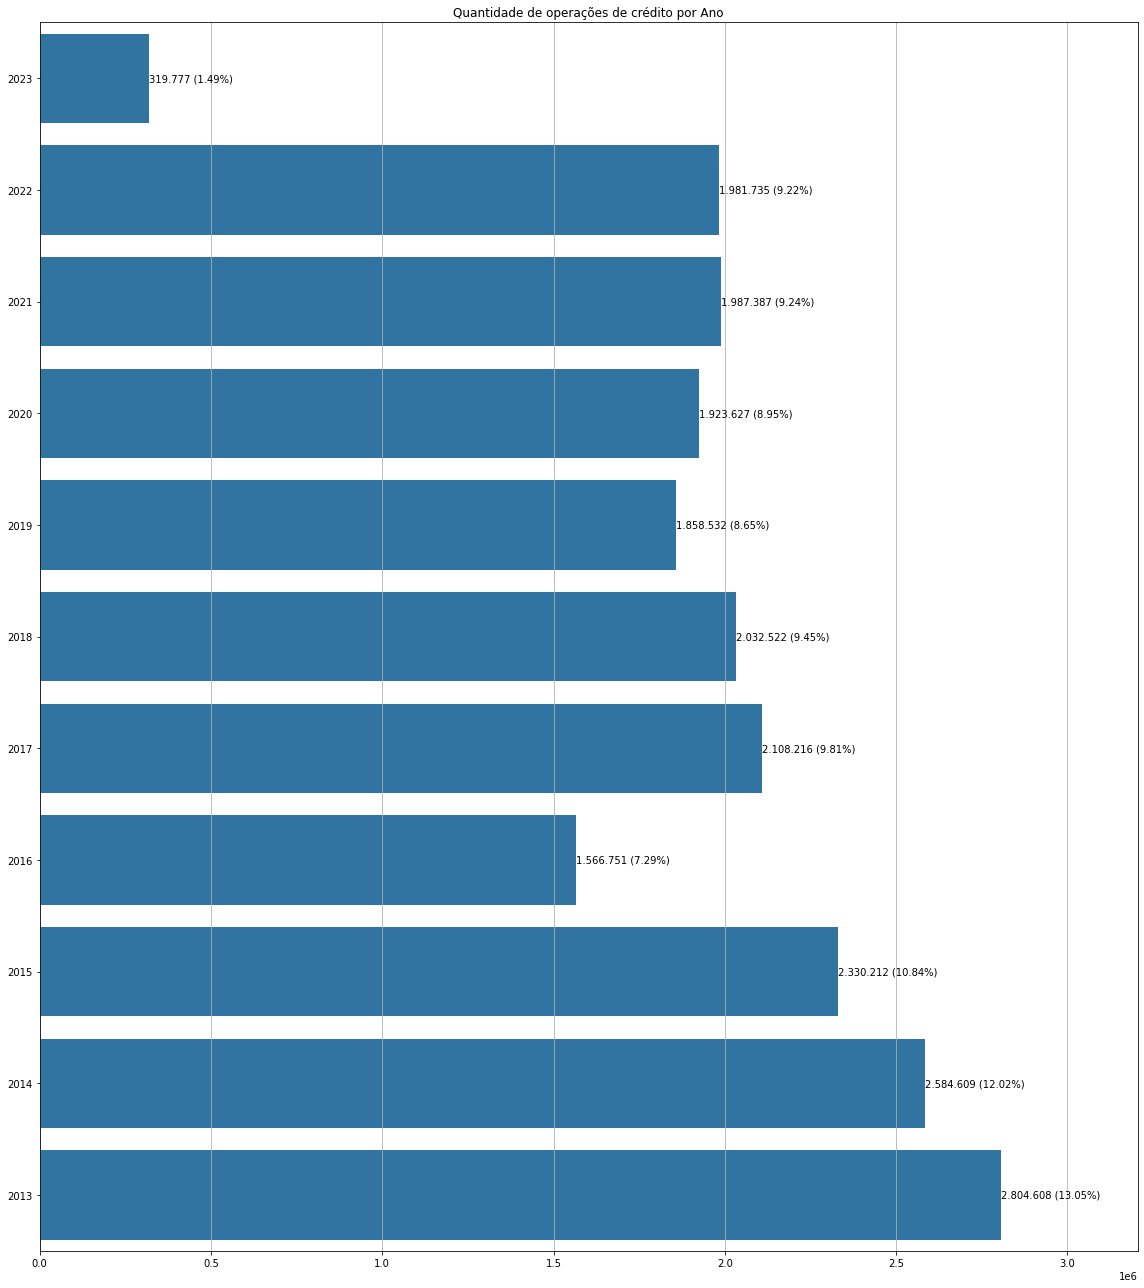

In [7]:
df_ano = df['ano'].value_counts().reset_index()
df_ano.columns = ['ano', 'quantidade']
df_ano['percentual'] = ((df_ano['quantidade'] / df_ano['quantidade'].sum()) * 100).round(2)
anos_ordenados = df_ano.sort_values('ano', ascending=False)['ano']

plt.figure(figsize=(16, 18))
ax = sns.barplot(data=df_ano, y='ano', x='quantidade', orient="y", order=anos_ordenados)
df_ano_sorted = df_ano.set_index('ano').loc[anos_ordenados].reset_index()
for i, (index, row) in enumerate(df_ano_sorted[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{valor:,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(valor, i, valor_e_percentual_formatado, ha='left', va='center', fontsize=10)
ax.grid(True, axis='x')
plt.title('Quantidade de operações de crédito por Ano')
plt.ylabel(None)
plt.xlabel(None)
plt.xlim(right=df_ano.quantidade.max()+400000)
plt.tight_layout()
plt.show()

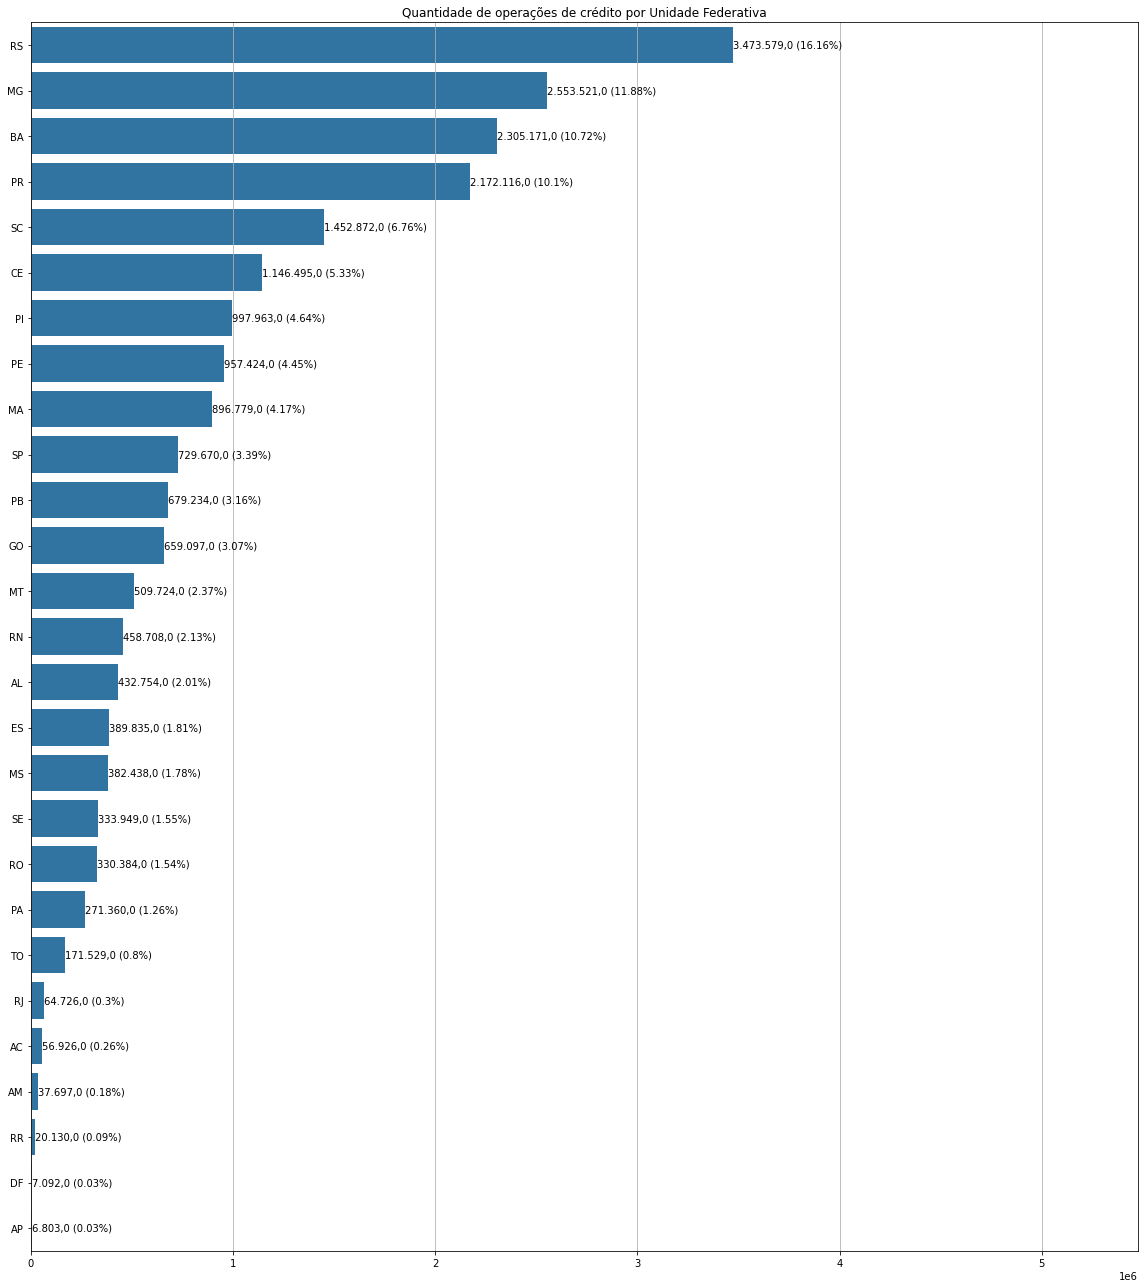

In [8]:
df_uf = df['sigla_uf'].value_counts().reset_index()
df_uf.columns = ['sigla_uf', 'quantidade']
df_uf['percentual'] = ((df_uf['quantidade'] / df_uf['quantidade'].sum()) * 100).round(2)
uf_ordenados = df_uf.sort_values('quantidade', ascending=False)['sigla_uf']

plt.figure(figsize=(16, 18))
ax = sns.barplot(data=df_uf, y='sigla_uf', x='quantidade', orient="y")
df_uf = df_uf.set_index('sigla_uf').loc[uf_ordenados].reset_index()
for i, (index, row) in enumerate(df_uf[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{valor:,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(valor, i, valor_e_percentual_formatado, ha='left', va='center', fontsize=10)
ax.grid(True, axis='x')
plt.title('Quantidade de operações de crédito por Unidade Federativa')
plt.ylabel(None)
plt.xlabel(None)
plt.xlim(right=df_uf.quantidade.max()+2000000)
plt.tight_layout()
plt.show()

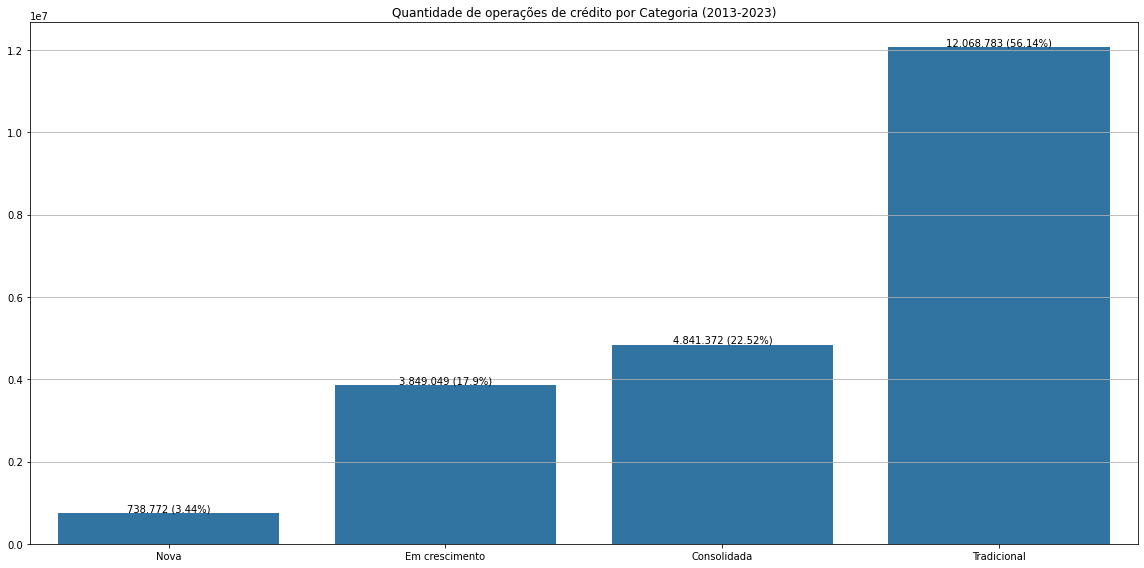

In [9]:
df_modalidade = df['categoria_empresa'].value_counts().reset_index()
df_modalidade.columns = ['categoria_empresa', 'quantidade']
df_modalidade['percentual'] = ((df_modalidade['quantidade'] / df_modalidade['quantidade'].sum()) * 100).round(2)
ordem = ['Nova','Em crescimento','Consolidada','Tradicional']

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=df_modalidade, x='categoria_empresa', y='quantidade', order=ordem)
for i, (index, row) in enumerate(df_modalidade[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(df_modalidade['categoria_empresa'][i], valor, valor_e_percentual_formatado, 
                ha='center', va='bottom', fontsize=10)
ax.grid(True, axis='y')
plt.title('Quantidade de operações de crédito por Categoria (2013-2023)')
plt.ylabel(None)
plt.xlabel(None)
plt.tight_layout()
plt.show()

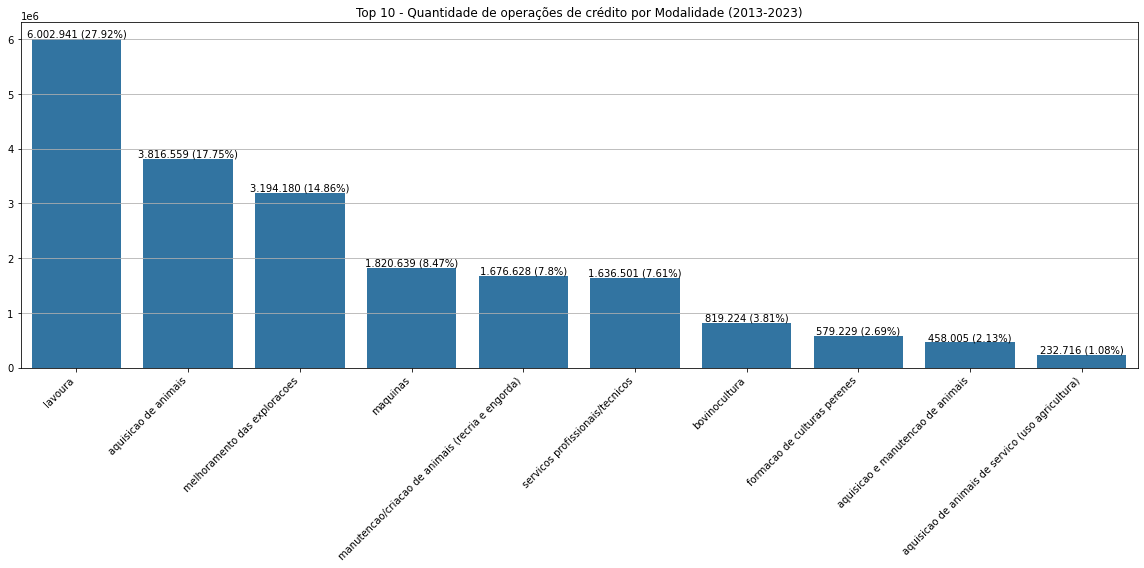

In [10]:
df_modalidade = df['modalidade'].value_counts().reset_index()
df_modalidade.columns = ['modalidade', 'quantidade']
df_modalidade['percentual'] = ((df_modalidade['quantidade'] / df_modalidade['quantidade'].sum()) * 100).round(2)
top_10_modalidades = df_modalidade.sort_values('quantidade', ascending=False).head(10).reset_index()
ordem = top_10_modalidades['modalidade']

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=top_10_modalidades, x='modalidade', y='quantidade', legend=False, order=ordem)
for i, (index, row) in enumerate(top_10_modalidades[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(top_10_modalidades['modalidade'][i], valor, valor_e_percentual_formatado, 
                ha='center', va='bottom', fontsize=10)
ax.grid(True, axis='y')
plt.title('Top 10 - Quantidade de operações de crédito por Modalidade (2013-2023)')
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
df_agricola = df[df['atividade'] == 'agricola'] # filtrando por atividades agrículas
df_pecuario = df[df['atividade'] == 'pecuario(a)'] # filtrando por atividades pecuárias

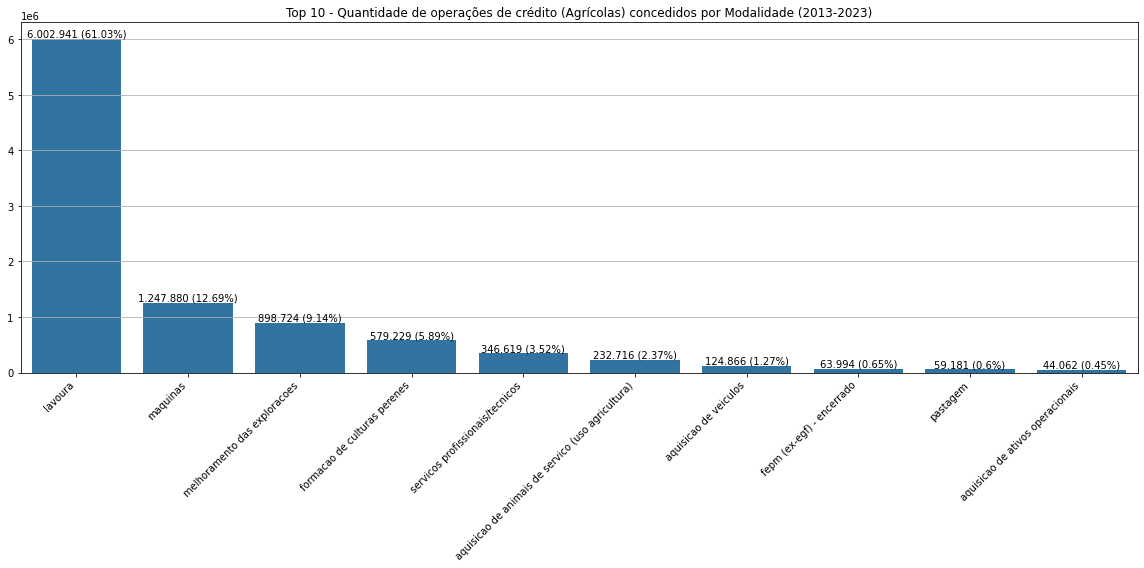

In [12]:
df_modalidade = df_agricola['modalidade'].value_counts().reset_index()
df_modalidade.columns = ['modalidade', 'quantidade']
df_modalidade['percentual'] = ((df_modalidade['quantidade'] / df_modalidade['quantidade'].sum()) * 100).round(2)
top_10_modalidades = df_modalidade.sort_values('quantidade', ascending=False).head(10).reset_index()
ordem = top_10_modalidades['modalidade']

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=top_10_modalidades, x='modalidade', y='quantidade', legend=False, order=ordem)
for i, (index, row) in enumerate(top_10_modalidades[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(top_10_modalidades['modalidade'][i], valor, valor_e_percentual_formatado, 
                ha='center', va='bottom', fontsize=10)
ax.grid(True, axis='y')
plt.title('Top 10 - Quantidade de operações de crédito (Agrícolas) concedidos por Modalidade (2013-2023)')
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

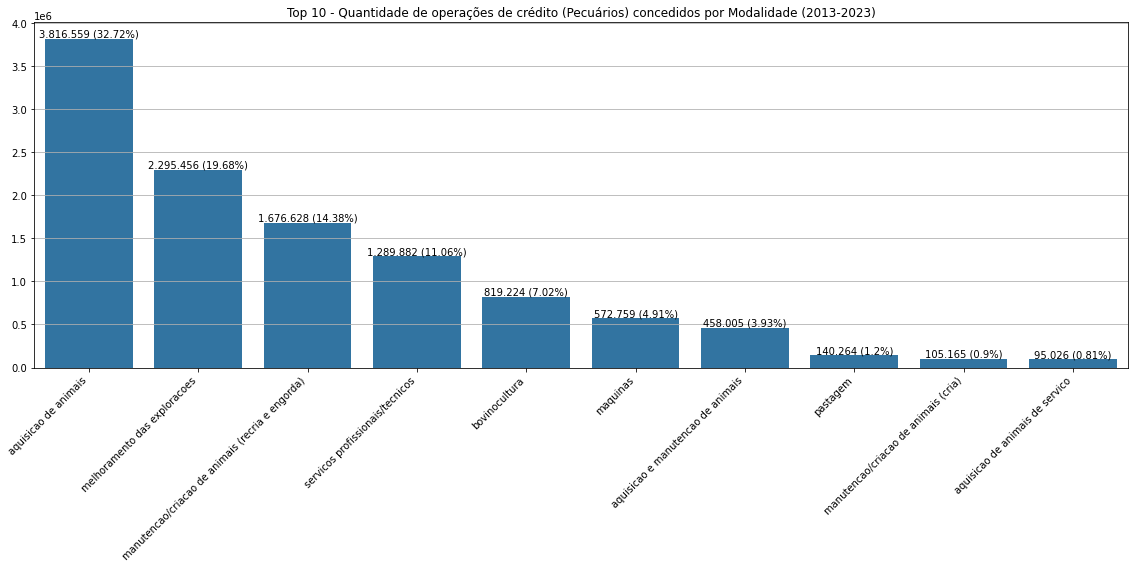

In [13]:
df_modalidade = df_pecuario['modalidade'].value_counts().reset_index()
df_modalidade.columns = ['modalidade', 'quantidade']
df_modalidade['percentual'] = ((df_modalidade['quantidade'] / df_modalidade['quantidade'].sum()) * 100).round(2)
top_10_modalidades = df_modalidade.sort_values('quantidade', ascending=False).head(10).reset_index()
ordem = top_10_modalidades['modalidade']

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=top_10_modalidades, x='modalidade', y='quantidade', legend=False, order=ordem)
for i, (index, row) in enumerate(top_10_modalidades[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(top_10_modalidades['modalidade'][i], valor, valor_e_percentual_formatado, 
                ha='center', va='bottom', fontsize=10)
ax.grid(True, axis='y')
plt.title('Top 10 - Quantidade de operações de crédito (Pecuários) concedidos por Modalidade (2013-2023)')
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

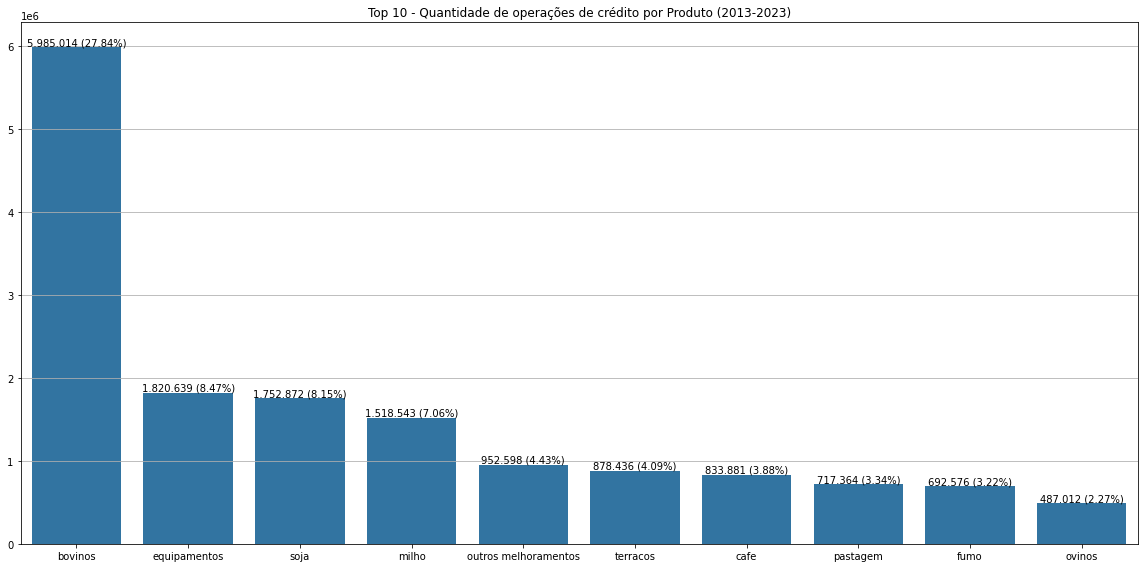

In [14]:
df_produto = df['produto'].value_counts().reset_index()
df_produto.columns = ['produto', 'quantidade']
df_produto['percentual'] = ((df_produto['quantidade'] / df_produto['quantidade'].sum()) * 100).round(2)
top_10_produto = df_produto.sort_values('quantidade', ascending=False).head(10).reset_index()
ordem = top_10_produto['produto']

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=top_10_produto, x='produto', y='quantidade', legend=False, order=ordem)
for i, (index, row) in enumerate(top_10_produto[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(top_10_produto['produto'][i], valor, valor_e_percentual_formatado, 
                ha='center', va='bottom', fontsize=10)
ax.grid(True, axis='y')
plt.title('Top 10 - Quantidade de operações de crédito por Produto (2013-2023)')
plt.ylabel(None)
plt.xlabel(None)
plt.tight_layout()
plt.show()

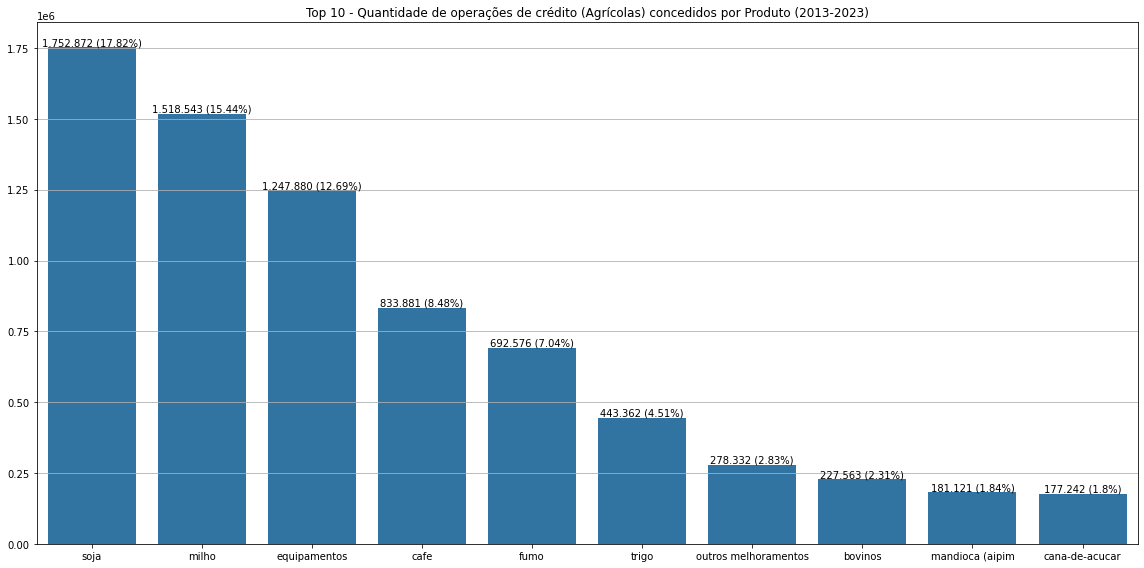

In [15]:
df_produto = df_agricola['produto'].value_counts().reset_index()
df_produto.columns = ['produto', 'quantidade']
df_produto['percentual'] = ((df_produto['quantidade'] / df_produto['quantidade'].sum()) * 100).round(2)
top_10_produto = df_produto.sort_values('quantidade', ascending=False).head(10).reset_index()
ordem = top_10_produto['produto']

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=top_10_produto, x='produto', y='quantidade', legend=False, order=ordem)
for i, (index, row) in enumerate(top_10_produto[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(top_10_produto['produto'][i], valor, valor_e_percentual_formatado, 
                ha='center', va='bottom', fontsize=10)
ax.grid(True, axis='y')
plt.title('Top 10 - Quantidade de operações de crédito (Agrícolas) concedidos por Produto (2013-2023)')
plt.ylabel(None)
plt.xlabel(None)
plt.tight_layout()
plt.show()

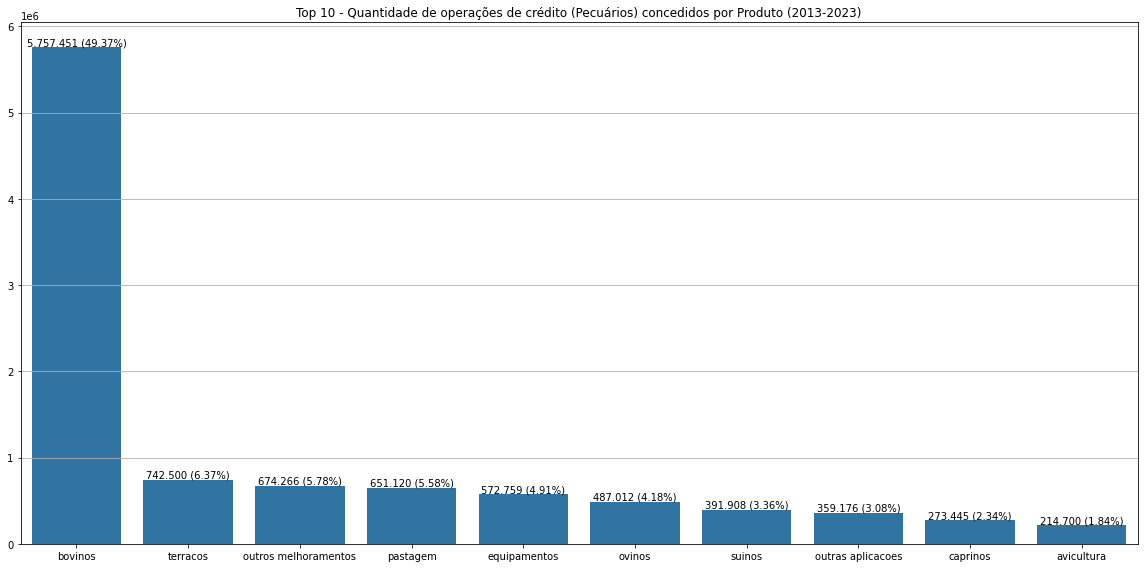

In [16]:
df_produto = df_pecuario['produto'].value_counts().reset_index()
df_produto.columns = ['produto', 'quantidade']
df_produto['percentual'] = ((df_produto['quantidade'] / df_produto['quantidade'].sum()) * 100).round(2)
top_10_produto = df_produto.sort_values('quantidade', ascending=False).head(10).reset_index()
ordem = top_10_produto['produto']

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=top_10_produto, x='produto', y='quantidade', legend=False, order=ordem)
for i, (index, row) in enumerate(top_10_produto[['quantidade', 'percentual']].iterrows()):
    valor = row['quantidade']
    percentual = row['percentual']
    valor_formatado = f"{int(valor):,}".replace(",", "X").replace(".", ",").replace("X", ".")
    valor_e_percentual_formatado = f"{valor_formatado} ({percentual}%)"
    ax.text(top_10_produto['produto'][i], valor, valor_e_percentual_formatado, 
                ha='center', va='bottom', fontsize=10)
ax.grid(True, axis='y')
plt.title('Top 10 - Quantidade de operações de crédito (Pecuários) concedidos por Produto (2013-2023)')
plt.ylabel(None)
plt.xlabel(None)
plt.tight_layout()
plt.show()

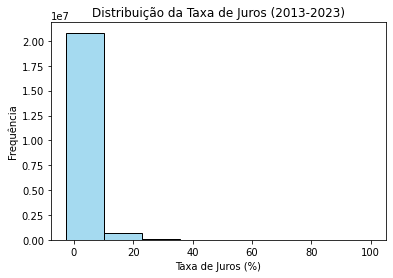

In [17]:
sns.histplot(df['taxa_juro'], bins=8, color='skyblue')
plt.title('Distribuição da Taxa de Juros (2013-2023)')
plt.xlabel('Taxa de Juros (%)')
plt.ylabel('Frequência')
plt.show()

### Dados sobre versão

In [18]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat
print("Python:", sys.version)
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("seaborn:", sns.__version__)
print("matplotlib:", mat.__version__)

Python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
pandas: 2.2.3
numpy: 1.23.5
seaborn: 0.13.2
matplotlib: 3.9.4
